In [42]:
import matplotlib.pyplot as plt
from numpy import degrees, sign, arccos, arcsin, trunc, pi, real, array
from functools import reduce

## Volumes

### Tronco de Piramide

In [2]:
Area01 = 50
Area02 = 60
Elev01 = 100
Elev02 = 120

In [3]:
Area01 = input('Area 01 : ')
Elev01 = input('Elevação 01 : ')
Area02 = input('Area 02 : ')
Elev02 = input('Elevação 02 : ')
Area01, Elev01, Area02, Elev02 = float(Area01), float(Elev01), float(Area02), float(Elev02)

Area 01 :  50
Elevação 01 :  60
Area 02 :  100
Elevação 02 :  120


In [4]:
h = abs(Elev01 - Elev02)
s = (Area01 + Area02 + (max(Area01, Area02) * min(Area01, Area02)) ** (1/2))
TroncoPiramideVolume = h * s

In [5]:
print('Volume Tronco de Piramide : {0:0.3f}m³'.format(TroncoPiramideVolume))

Volume Tronco de Piramide : 13242.641m³


### Volume em Cilindro

In [33]:
Raio = 36 * 0.0254
Comprimento = 12

In [34]:
VolumeCilindro = (pi * Raio) * Comprimento

In [35]:
print('Volume do Cilindro : {0:0.2f}'.format(VolumeCilindro))

Volume do Cilindro : 34.47


## Geometria

In [24]:
def PointListDistSort(Pbase, PointList=[]):
    PointAnalize = []
    Points = []
    for p1 in PointList:
        dist = distance(Pbase, p1)
        if dist != float(0):
            PointAnalize.append([dist, p1])
            pass
        pass
    PointAnalize.sort()
    for p in PointAnalize:
        #print(p)
        Points.append(p[1])
    return Points

In [6]:
def distance(P1=[], P2=[]): # =RAIZ(((a2-a1)^2)+((b2-b1)^2))
    if len(P1) == 3 and len(P2) == 3:
        return (((P2[0] - P1[0])**2) + ((P2[1] - P1[1])**2) + ((P2[2] - P1[2])**2)) ** (1/2)
    else:
        return (((P2[0] - P1[0])**2) + ((P2[1] - P1[1])**2)) ** (1/2)

In [37]:
def angHorario(P1=[], P2=[], P3=[]):
    Calc = ( ((P2[0] - P1[0]) * (P3[1] - P1[0])) - ((P2[1] - P1[1]) * (P3[0] - P1[0])), 0)
    return (Calc[0] > Calc[1]) - (Calc[0] < Calc[1])

### Angulo Central

In [166]:
Point1 = [211.6525, 160.6591, 0.0000]
Point2 = [304.3397, 198.1969, 0.0000]
Point3 = [393.5023, 152.9196, 0.0000]

In [167]:
A = (((Point1[0] - Point3[0])**2) + ((Point1[1] - Point3[1])**2)) ** (1/2)
B = (((Point2[0] - Point3[0])**2) + ((Point2[1] - Point3[1])**2)) ** (1/2)
C = (((Point1[0] - Point2[0])**2) + ((Point1[1] - Point2[1])**2)) ** (1/2)

In [168]:
Form1 = (A)**2 - (B)**2 - (C)**2
Form2 = (B * C) * 2
Form3 = Form1 / Form2
Facos = arccos(Form3)
Fasin = arcsin(Form3)

In [169]:
ANG = trunc(degrees(Facos))
ANG = '{:0003.0f}°'.format(ANG)

MIN = int(((int((degrees(Facos) - int(degrees(Facos))) * 100)) / 100) * 60)
MIN = '{:02d}\''.format(MIN)

SEC = (degrees(Facos * 100) - int(degrees(Facos * 100))) * 60
SEC = '{:002.2f}"'.format(SEC)

ANGLE = ANG + MIN + SEC

In [170]:
print('AC : {}'.format(ANGLE))

print('AC // ACOS : {0:0.6f}\nAC // ASIN : {1:0.6f}'.format(degrees(Facos), degrees(Fasin)))

AC : 048°57'56.43"
AC // ACOS : 48.969405
AC // ASIN : 41.030595


##### Rascunho Lamba

In [184]:
list(map((lambda x, y: x**2 / y), [5, 13, 12], [30, 25, 74]))

[0.8333333333333334, 6.76, 1.945945945945946]

In [187]:
test = lambda x, y : (x / y) ** pi
test( 12 , 6 )

8.824977827076287

## Grahan Scan

In [58]:
def GrahanScan(Points):
    LEFT, RIGHT, NONE = (1, -1, 0)
    
    def side(a, b):
        return (a > b) - (a < b)
    
    def turn(f, m, l):
        return side((m[0] - f[0])*(l[1] - f[1]) - (l[0] - f[0])*(m[1] - f[1]), 0)
    
    def left(LPoints, point):
        while len(LPoints) > 1 and turn(LPoints[-2], LPoints[-1], point) != LEFT:
            LPoints.pop()
            pass
        if not len(LPoints) or LPoints[-1] != point:
            LPoints.append(point)
            pass
        return LPoints
    
    Points = sorted(Points)
    l = reduce(left, Points, [])
    u = reduce(left, reversed(Points), [])
    return l.extend(u[i] for i in range(1, len(u) - 1)) or l

In [65]:
plista = [[101, 12], [103, 14], [102, 13], [101, 16], [103, 13], [102, 18], [104, 19], [100, 15], [130, 22], [126, 18]]

In [66]:
plistA = GrahanScan(plista)

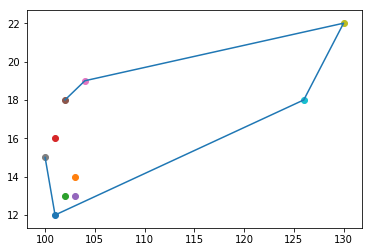

In [67]:
try:
    plistA = array(plistA)
    plt.plot(plistA[:, [0]], plistA[:, [1]])
    pass
except:
    pass
for p in plista:
    plt.scatter(p[0], p[1])
    pass
plt.show()